# Modules

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# DataFrame

In [396]:
df_xrp = pd.read_csv('XRP.csv', index_col='Date').loc[::-1]

In [397]:
df_xrp.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Jan 01, 2017",0.00635,0.00651,0.00660,0.00626,189.01K,-2.53%
"Jan 02, 2017",0.00631,0.00635,0.00642,0.00621,554.90K,-0.54%
"Jan 03, 2017",0.00641,0.00631,0.00657,0.00622,1.82M,1.57%
"Jan 04, 2017",0.00641,0.00641,0.00684,0.00637,888.03K,0.00%
"Jan 05, 2017",0.00628,0.00641,0.00689,0.00565,9.61M,-2.09%


In [398]:
df_xrp.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Sep 11, 2018",0.26425,0.26995,0.27500,0.25251,1.77M,-1.88%
"Sep 12, 2018",0.27000,0.26425,0.27280,0.25300,2.22M,2.18%
"Sep 13, 2018",0.27820,0.27000,0.28518,0.26703,2.17M,3.04%
"Sep 14, 2018",0.27705,0.27820,0.28518,0.27203,2.43M,-0.41%
"Sep 15, 2018",0.28120,0.27705,0.28423,0.27600,3.09M,1.50%


### The target it will be predicting the price on Sep 12 up to Sep 15, 2018

In [399]:
df_xrp = pd.read_csv('XRP.csv', index_col='Date').loc[::-1].iloc[:-4,:]

In [400]:
df_xrp.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Sep 07, 2018",0.28702,0.30135,0.30388,0.28027,2.71M,-4.76%
"Sep 08, 2018",0.27735,0.28702,0.29346,0.26924,1.57M,-3.37%
"Sep 09, 2018",0.27556,0.27735,0.29020,0.27100,1.72M,-0.64%
"Sep 10, 2018",0.26930,0.27556,0.28196,0.25926,2.85M,-2.27%
"Sep 11, 2018",0.26425,0.26995,0.27500,0.25251,1.77M,-1.88%


# Training and test data

In [401]:
X = df_xrp[['Open', 'High', 'Low']]

In [402]:
y = df_xrp.Price

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Plot price

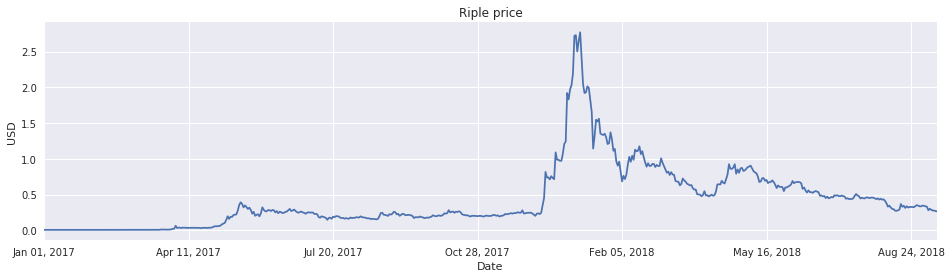

In [409]:
plt.figure(figsize=(16, 4))
y.plot()
plt.ylabel('USD')
plt.title('Riple price')
plt.show()

# Model

In [350]:
# Polynomial model degree 2
model = make_pipeline(PolynomialFeatures(degree=2), Ridge())

In [351]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [352]:
model.score(X_test, y_test)

0.99023995313163626

# Cross Validation

In [354]:
from sklearn.model_selection import cross_val_score

In [355]:
scores = cross_val_score(model, X, y, cv=5)

In [356]:
scores

array([ 0.95340633,  0.94538683,  0.99018883,  0.9836242 ,  0.99003227])

In [357]:
print('Scores mean: {}'.format(np.mean(scores)))

Scores mean: 0.972527691753775


# Testing model Jun 01, 2018

In [410]:
res = model.predict(np.array([[0.61240], [0.62381], [0.60500]]).T)
print('Jun 01, 2018\n')
print('Real price: {}'.format(df_xrp.loc['Jun 01, 2018']['Price']))
print('Predicted price: {}'.format(res))

Jun 01, 2018

Real price: 0.622
Predicted price: [ 0.61051195]


# Testing model for Sep 12 up to Sep 15, 2018

In [358]:
X_test1 = pd.read_csv('XRP.csv', index_col='Date').iloc[: 4, 1: 4].loc[::-1]

In [359]:
X_test1

,Open,High,Low
Date,,,
"Sep 12, 2018",0.26425,0.27280,0.25300
"Sep 13, 2018",0.27000,0.28518,0.26703
"Sep 14, 2018",0.27820,0.28518,0.27203
"Sep 15, 2018",0.27705,0.28423,0.27600


In [360]:
real_price = pd.read_csv('XRP.csv', index_col='Date').iloc[: 4, : 1].loc[::-1]

In [361]:
real_price

,Price
Date,
"Sep 12, 2018",0.27000
"Sep 13, 2018",0.27820
"Sep 14, 2018",0.27705
"Sep 15, 2018",0.28120


In [362]:
y_predicted = model.predict(X_whished)
print('y predicted: {}'.format(y_predicted))

y predicted: [ 0.26496324  0.27678377  0.27957077  0.28023093]


# Sep 16, 2018

In [363]:
price_sep16 = model.predict(np.array([[0.28120], [0.28176], [0.27400]]).T)

In [364]:
price_sep16

array([ 0.27886365])